In class programming:
1. Use the use case in the class:
a. Add more Dense layers to the existing code and check how the accuracy changes.
2. Change the data source to Breast Cancer dataset * available in the source code folder and make required
changes. Report accuracy of the model.
3. Normalize the data before feeding the data to the model and check how the normalization change your
accuracy (code given below).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Breast Cancer dataset is designated to predict if a patient has Malignant (M) or Benign = B cancer


In [1]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()# Loading Breast Cancer dataset
X = data.data  # Features (data)
y = data.target  # Target (labels)
sc = StandardScaler()# Normalizing the data
X_normalized = sc.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
model = Sequential()# Defining the model and adding dense layers
model.add(Dense(64, activation='relu', input_dim=30))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Additional Dense layer
model.add(Dense(16, activation='relu'))  # Additional Dense layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])# Compiling the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)# Training the model
_, accuracy = model.evaluate(X_test, y_test)# Calculating accuracy
print("Accuracy:", accuracy)

Epoch 1/10
12/12 [==============================] - 6s 89ms/step - loss: 0.5467 - accuracy: 0.8379 - val_loss: 0.3798 - val_accuracy: 0.9011
Epoch 2/10
12/12 [==============================] - 0s 24ms/step - loss: 0.3173 - accuracy: 0.9093 - val_loss: 0.2179 - val_accuracy: 0.9121
Epoch 3/10
12/12 [==============================] - 0s 25ms/step - loss: 0.1889 - accuracy: 0.9423 - val_loss: 0.1529 - val_accuracy: 0.9341
Epoch 4/10
12/12 [==============================] - 0s 22ms/step - loss: 0.1231 - accuracy: 0.9588 - val_loss: 0.1189 - val_accuracy: 0.9560
Epoch 5/10
12/12 [==============================] - 0s 19ms/step - loss: 0.0867 - accuracy: 0.9753 - val_loss: 0.1046 - val_accuracy: 0.9780
Epoch 6/10
12/12 [==============================] - 0s 27ms/step - loss: 0.0694 - accuracy: 0.9780 - val_loss: 0.0997 - val_accuracy: 0.9451
Epoch 7/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0571 - accuracy: 0.9863 - val_loss: 0.0989 - val_accuracy: 0.9560
Epoch 8/10
12

In class programming:

Use Image Classification on the hand written digits data set (mnist)
1. Plot the loss and accuracy for both training data and validation data using the history object in the source
code.
2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.
3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens.
4. Run the same code without scaling the images and check the performance?

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3844 - accuracy: 0.8925 - val_loss: 0.2140 - val_accuracy: 0.9397
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1849 - accuracy: 0.9460 - val_loss: 0.1562 - val_accuracy: 0.9557
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1306 - accuracy: 0.9622 - val_loss: 0.1319 - val_accuracy: 0.9627
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0992 - accuracy: 0.9712 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0774 - accuracy: 0.9775 - val_loss: 0.1014 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0594 - accuracy: 0.9834 - val_loss: 0.1000 - val_accuracy: 0.9693
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0480 - 

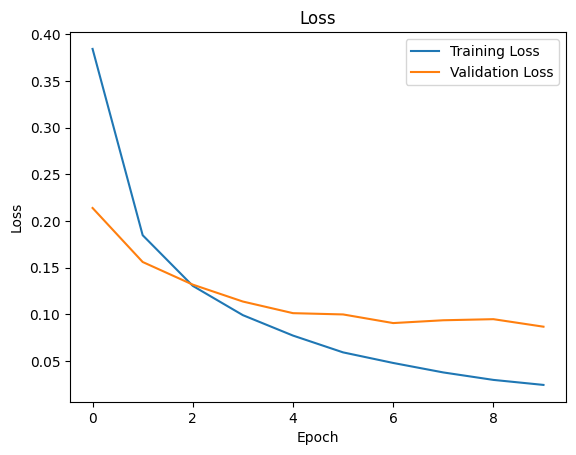

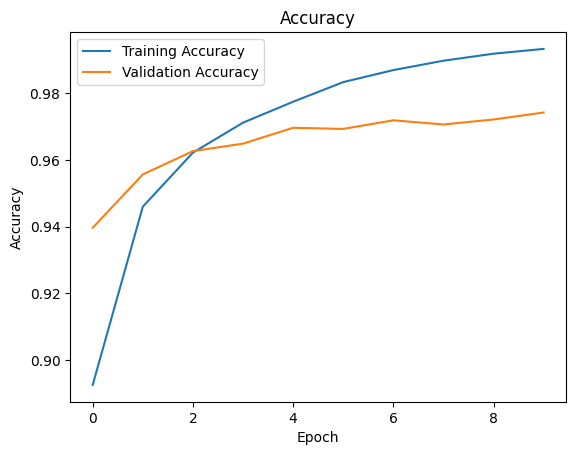

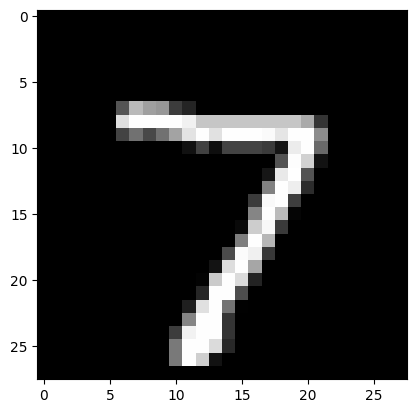

1/1 [==============================] - 0s 95ms/step
Predicted class: 7


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Change number of hidden layers and activation function
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
#  Plot loss function and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot one image and do inferencing to check
plt.imshow(X_test[0], cmap='gray')
plt.show()
# checking the performance
prediction = model.predict(X_test[0].reshape(1, 28, 28))
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)